In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Library declaration**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

**Reading Dataset**

In [ ]:
data = pd.read_csv("/content/drive/My Drive/adult.data")
data

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


**checking for null values**

In [ ]:
data.isna().sum()

39                0
 State-gov        0
 77516            0
 Bachelors        0
 13               0
 Never-married    0
 Adm-clerical     0
 Not-in-family    0
 White            0
 Male             0
 2174             0
 0                0
 40               0
 United-States    0
 <=50K            0
dtype: int64

**Renaming Columns**



In [ ]:
data.columns = ["age","workclass","fnlwgt","education","education-num","maritalstatus","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week",
"nativecountry","income"]
data

,age,workclass,fnlwgt,education,education-num,maritalstatus,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,nativecountry,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
num_attributes = data.select_dtypes(include=['int'])
print(num_attributes.columns)

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


**Checking for missing values**

In [ ]:
print(data['workclass'].unique())
print(data['education'].unique())
print(data['education-num'].unique())
print(data['maritalstatus'].unique())
print(data['occupation'].unique())
print(data['relationship'].unique())
print(data['race'].unique())
print(data['sex'].unique())
print(data['capital-gain'].unique())
print(data['capital-loss'].unique())
print(data['hours-per-week'].unique())
print(data['nativecountry'].unique())
print(data['income'].unique())
print(data['fnlwgt'].unique())

[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
[' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' Priv-house-serv']
[' Husband' ' Not-in-family' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
[' Male' ' Female']
[    0 14084  5178  5013  2407 14344 15024  7688 34095  4064  4386  7298
  1409

**Filling missing values**

In [ ]:
data['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [ ]:
data['occupation'] = data['occupation'].replace(" ?"," Prof-specialty")

In [ ]:
data['occupation'].value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [ ]:
data['workclass'] = data['workclass'].replace(" ?"," Private")

In [ ]:
data['nativecountry'] = data['nativecountry'].replace(" ?"," United-States")

**Data Visualization**

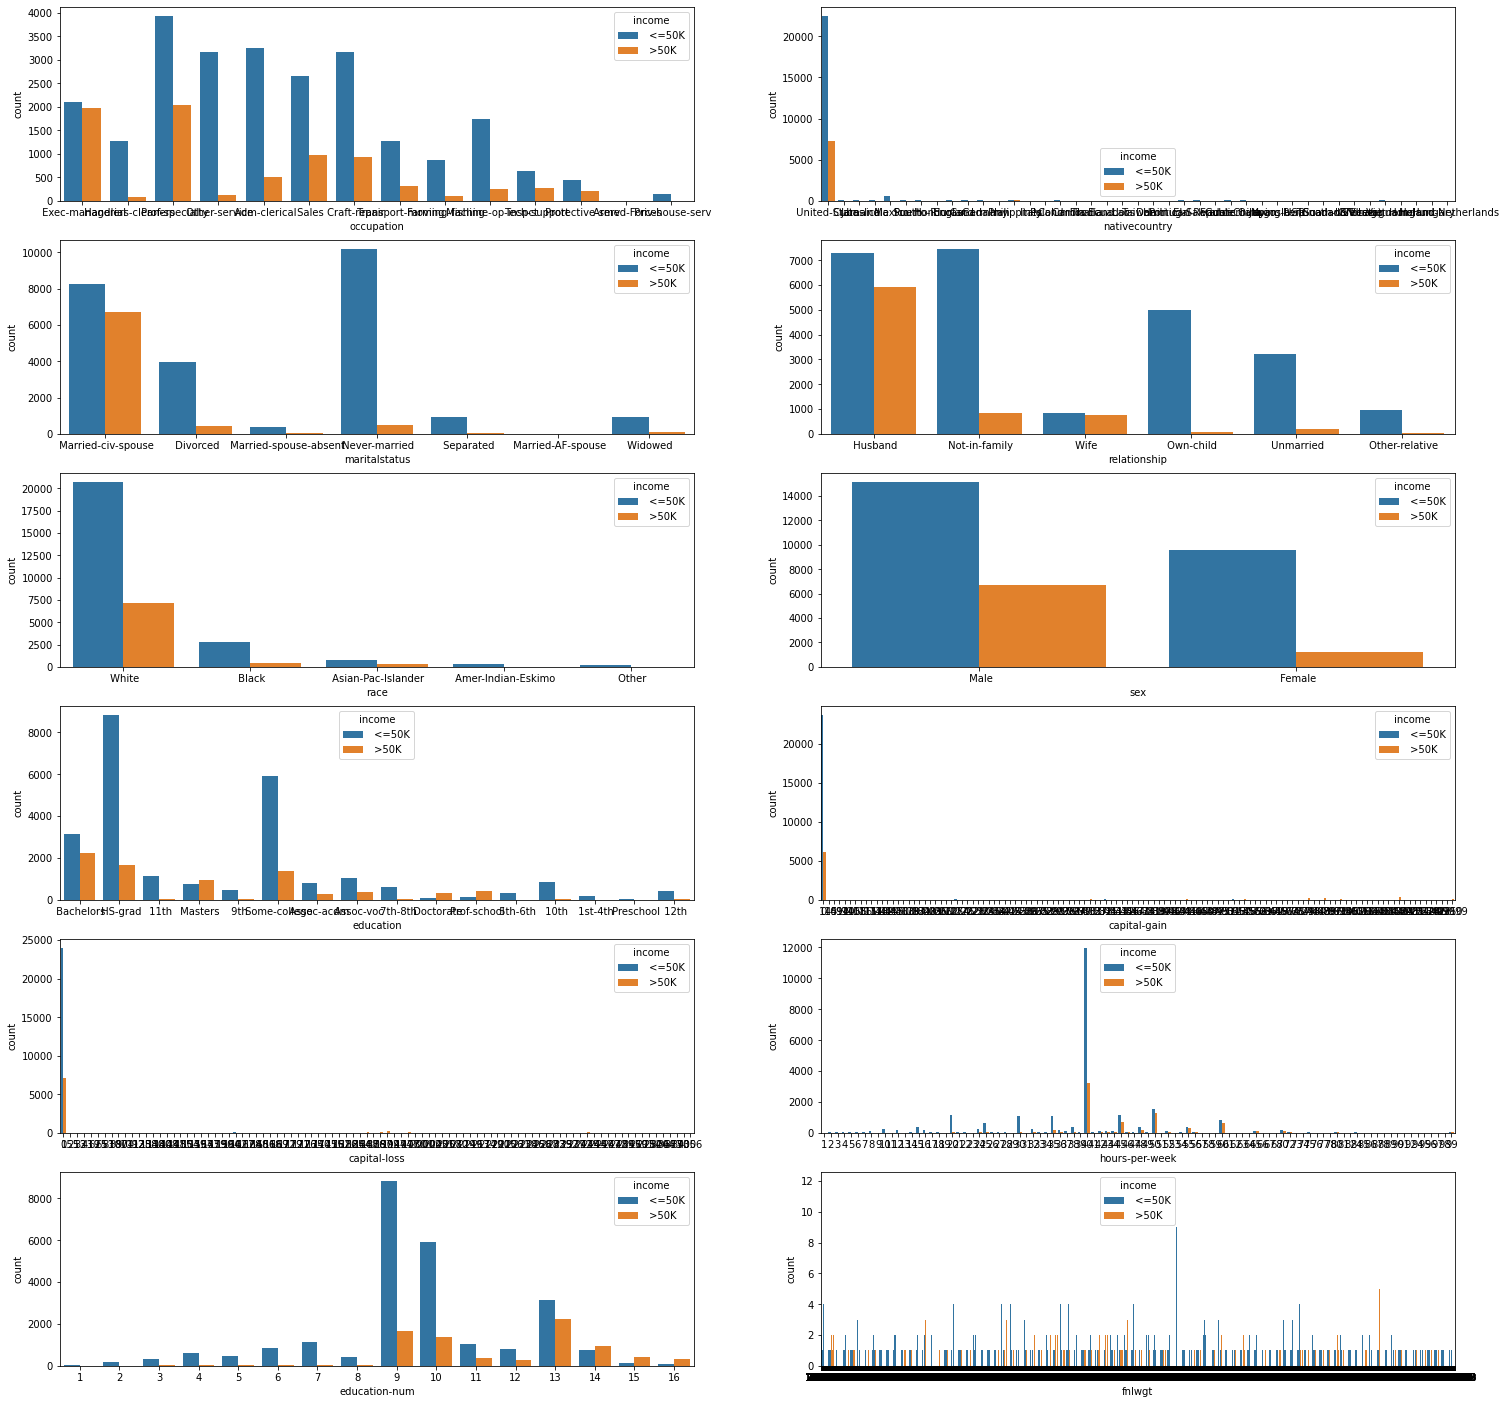

In [ ]:
fig, axarr = plt.subplots(6,2, figsize=(25, 25))
sns.countplot(x='occupation', hue='income',data=data,ax=axarr[0][0])
sns.countplot(x='nativecountry',hue='income',data = data,ax=axarr[0][1])
sns.countplot(x='maritalstatus', hue='income', data=data,ax=axarr[1][0])
sns.countplot(x="relationship", hue="income", data=data,ax=axarr[1][1])
sns.countplot(x="race", hue="income", data=data,ax=axarr[2][0])
sns.countplot(x="sex", hue="income", data=data,ax=axarr[2][1])
sns.countplot(x="education", hue="income", data=data,ax=axarr[3][0])
sns.countplot(x="capital-gain", hue="income", data=data,ax=axarr[3][1])
sns.countplot(x="capital-loss", hue="income", data=data,ax=axarr[4][0])
sns.countplot(x="hours-per-week", hue="income", data=data,ax=axarr[4][1])
sns.countplot(x="education-num", hue="income", data=data,ax=axarr[5][0])
sns.countplot(x="fnlwgt", hue="income", data=data,ax=axarr[5][1])



In [ ]:
pip install bubble_plot


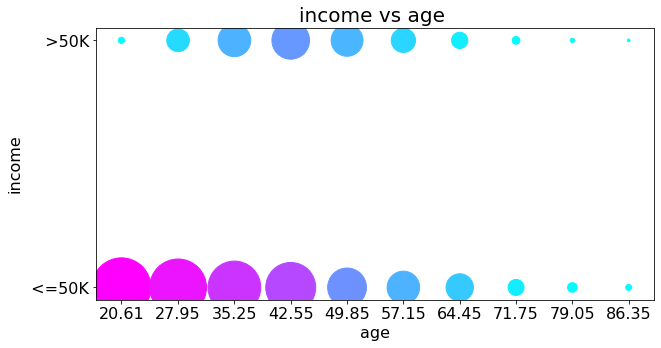

In [ ]:
from bubble_plot.bubble_plot import bubble_plot
bubble_plot(data,'age','income', normalization_by_all=True)


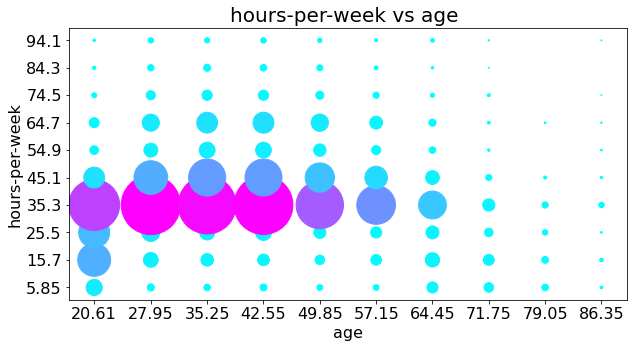

In [ ]:
bubble_plot(data,'age','hours-per-week', normalization_by_all=True)


**Data preprocessing**

In [ ]:
labelencoder = preprocessing.LabelEncoder()
data['workclass'] = labelencoder.fit_transform(data.workclass)
data['maritalstatus'] = labelencoder.fit_transform(data.maritalstatus)
data['occupation'] = labelencoder.fit_transform(data.occupation)
data['relationship'] = labelencoder.fit_transform(data.relationship)
data['race'] = labelencoder.fit_transform(data.race)
data['sex'] = labelencoder.fit_transform(data.sex)
data['nativecountry'] = labelencoder.fit_transform(data.nativecountry)
data['income'] = labelencoder.fit_transform(data.income)
data

,age,workclass,fnlwgt,education,education-num,maritalstatus,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,nativecountry,income
0,50,5,83311,Bachelors,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,HS-grad,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,11th,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,Bachelors,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,Masters,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,Assoc-acdm,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,154374,HS-grad,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,151910,HS-grad,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,201490,HS-grad,9,4,0,3,4,1,0,0,20,38,0


**corelation between fnlwgt and income**

In [ ]:
column_1 = data['fnlwgt']
column_2 = data['income']
correlation = column_1.corr(column_2)
print(correlation)

-0.009481165679736104


**Preprocessing test data**

In [ ]:
columns = ["age","workclass","fnlwgt","education","education-num","maritalstatus","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week",
"nativecountry","income"]
testdata = pd.read_csv("/content/drive/My Drive/adult.test",skiprows=1,names=columns)
testdata

,age,workclass,fnlwgt,education,education-num,maritalstatus,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,nativecountry,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [ ]:
columns = ["age","workclass","fnlwgt","education","education-num","maritalstatus","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week",
"nativecountry","income"]
testdata = pd.read_csv("/content/drive/My Drive/adult.test",skiprows=1,names=columns)
testdata

,age,workclass,fnlwgt,education,education-num,maritalstatus,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,nativecountry,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [ ]:
testdata['occupation'] = testdata['occupation'].replace(" ?"," Prof-specialty")

In [ ]:
testdata['workclass'] = testdata['workclass'].replace(" ?"," Private")

In [ ]:
testdata['nativecountry'] = testdata['nativecountry'].replace(" ?"," United-States")

In [ ]:
labelencoder = preprocessing.LabelEncoder()
testdata['workclass'] = labelencoder.fit_transform(testdata.workclass)
testdata['maritalstatus'] = labelencoder.fit_transform(testdata.maritalstatus)
testdata['occupation'] = labelencoder.fit_transform(testdata.occupation)
testdata['relationship'] = labelencoder.fit_transform(testdata.relationship)
testdata['race'] = labelencoder.fit_transform(testdata.race)
testdata['sex'] = labelencoder.fit_transform(testdata.sex)
testdata['nativecountry'] = labelencoder.fit_transform(testdata.nativecountry)
testdata['income'] = labelencoder.fit_transform(testdata.income)
testdata

,age,workclass,fnlwgt,education,education-num,maritalstatus,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,nativecountry,income
0,25,3,226802,11th,7,4,6,3,2,1,0,0,40,37,0
1,38,3,89814,HS-grad,9,2,4,0,4,1,0,0,50,37,0
2,28,1,336951,Assoc-acdm,12,2,10,0,4,1,0,0,40,37,1
3,44,3,160323,Some-college,10,2,6,0,2,1,7688,0,40,37,1
4,18,3,103497,Some-college,10,4,9,3,4,0,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,3,215419,Bachelors,13,0,9,1,4,0,0,0,36,37,0
16277,64,3,321403,HS-grad,9,6,9,2,2,1,0,0,40,37,0
16278,38,3,374983,Bachelors,13,2,9,0,4,1,0,0,50,37,0
16279,44,3,83891,Bachelors,13,0,0,3,1,1,5455,0,40,37,0


**Dropping unwanted columns**

In [ ]:
train_data = data.drop(['fnlwgt','education'],axis=1)
test_data = testdata.drop(['fnlwgt','education'],axis=1)

**Splitting train and test data**

In [ ]:
x_train = train_data.drop(['income'],axis=1)
y_train = train_data['income']

In [ ]:
scaler = preprocessing.StandardScaler().fit(train_data)
scaler.transform(train_data)

array([[ 0.83709708,  1.72133587,  1.13477863, ..., -2.22212013,
         0.26137428, -0.5632099 ],
       [-0.04264043, -0.08522344, -0.42002663, ..., -0.03542999,
         0.26137428, -0.5632099 ],
       [ 1.05703146, -0.08522344, -1.19742926, ..., -0.03542999,
         0.26137428, -0.5632099 ],
       ...,
       [ 1.42358875, -0.08522344, -0.42002663, ..., -0.03542999,
         0.26137428, -0.5632099 ],
       [-1.21562378, -0.08522344, -0.42002663, ..., -1.65520046,
         0.26137428, -0.5632099 ],
       [ 0.98372   ,  0.81805622, -0.42002663, ..., -0.03542999,
         0.26137428,  1.77553698]])

In [ ]:
x_train = preprocessing.scale(x_train)

In [ ]:
x_test = test_data.drop(['income'],axis=1)
y_test = test_data['income']

In [ ]:
x_test = preprocessing.scale(x_test)

**Bagging classifier**

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier

In [ ]:
model = BaggingClassifier(n_estimators=50)
model.fit(x_train,y_train)


BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=50,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [ ]:
y_pred=model.predict(x_test)
acc_score=metrics.accuracy_score(y_test,y_pred)
print("Accuracy of Test:", acc_score)

Accuracy of Test: 0.8407960199004975


In [ ]:
y_pred = model.predict(x_train)

In [ ]:
acc_score = metrics.accuracy_score(y_train,y_pred)
print(acc_score)

0.9751228501228502


**Logistic Regression Implementation**

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0)
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Prediction of test data**

In [ ]:
y_pred=logreg.predict(x_test)

**Accuracy of test data**

In [ ]:
acc_score=metrics.accuracy_score(y_test,y_pred) #gives the accuracy of the model
print("Accuracy of Test:", acc_score)

Accuracy of Test: 0.8247036422824151


**Prediction of train data**

In [ ]:
y_pred = logreg.predict(x_train)

**Accuracy of train data**

In [ ]:
acc_score = metrics.accuracy_score(y_train,y_pred)
print(acc_score)

0.8248157248157248


**Random forest**

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(n_estimators=50,max_depth=10)
random_forest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred = random_forest.predict(x_test)

In [ ]:
acc_score=metrics.accuracy_score(y_test,pred) #gives the accuracy of the model
print("Accuracy of Test:", acc_score)

Accuracy of Test: 0.8571955039616731


In [ ]:
pred_train = random_forest.predict(x_train)

In [ ]:
acc_score=metrics.accuracy_score(y_train,pred_train) #gives the accuracy of the model
print("Accuracy of Test:", acc_score)

Accuracy of Test: 0.8677825552825553


**KNN IMPLEMENTATION**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=100)   
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                     weights='uniform')

**Prediction of test data**

In [ ]:
y_pred=knn.predict(x_test)

**Accuracy of test data**

In [ ]:
acc_score=metrics.accuracy_score(y_test,y_pred) 
print("Accuracy of Test:", acc_score)

Accuracy of Test: 0.8370493212947607


**Prediction of train data**

In [ ]:
y_pred=knn.predict(x_train)

**Accuracy of train data**

In [ ]:
acc_score = metrics.accuracy_score(y_train,y_pred)
print("Accuracy of Train:", acc_score)

Accuracy of Train: 0.8408783783783784


**Adaboost implementation**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
clf = AdaBoostClassifier(n_estimators=25, random_state=0, algorithm='SAMME')
clf.fit(x_train,y_train) 

AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=1.0,
                   n_estimators=25, random_state=0)

In [ ]:
clf_pred = clf.predict(x_train)
acc_score = metrics.accuracy_score(y_train,clf_pred)
print("Accuracy of Train:", acc_score)

Accuracy of Train: 0.8446560196560197


In [ ]:
clf_pred_test = clf.predict(x_test)
acc_score = metrics.accuracy_score(y_test,clf_pred_test)
print("Accuracy of Train:", acc_score)

Accuracy of Train: 0.8454026165468952


**GRADIENT BOOSTING**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gra_model = GradientBoostingClassifier(max_depth=4,n_estimators=100)
gra_model.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
gra_modl_pred = gra_model.predict(x_train)
acc_score = metrics.accuracy_score(y_train,gra_modl_pred)
print("Accuracy of Train:", acc_score)

Accuracy of Train: 0.8760135135135135


In [ ]:
gra_modl_pred_test = gra_model.predict(x_test)
acc_score = metrics.accuracy_score(y_test,gra_modl_pred_test)
print("Accuracy of Test:", acc_score)

Accuracy of Test: 0.865118850193477


**SVM IMPLEMENTATION**

In [ ]:
from sklearn import svm
svm_model = svm.SVC(kernel = 'linear').fit(x_train,y_train)

In [ ]:
svm_pred_train = svm_model.predict(x_train)
acc_score = metrics.accuracy_score(y_train,svm_pred_train)
print("Accuracy of Train:", acc_score)

Accuracy of Train: 0.8145884520884521


In [ ]:
svm_pred_test = svm_model.predict(x_test)
acc_score = metrics.accuracy_score(y_test,svm_pred_test)
print("Accuracy of Train:", acc_score)

Accuracy of Train: 0.8132792825993489


**Deccision tree classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(max_depth=7)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred=dtree.predict(x_test)
acc_score=metrics.accuracy_score(y_test,y_pred) #gives the accuracy of the model
print("Accuracy of Test:", acc_score)

Accuracy of Test: 0.8539401756648854


In [ ]:
y_pred=dtree.predict(x_train)
acc_score = metrics.accuracy_score(y_train,y_pred)
print("Accuracy of Train:", acc_score)

Accuracy of Train: 0.8592751842751842
